In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import h5py
import os
from operator import itemgetter
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from shutil import copy2

/home/fabian/anaconda3/envs/py36-phd/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
FOLDER = '../results'

In [17]:
model = ResNet50(weights='imagenet')
preds = []

for filename in os.listdir(FOLDER):
    if filename.endswith('.jpg'): 

        img_path = os.path.join(FOLDER, filename)
        img = image.load_img(img_path, target_size=(224, 224))

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        x_preds = model.predict(x)
        x_pred = decode_predictions(x_preds, top=5)[0][0]
        preds.append((filename, x_pred[1], x_pred[2]))
    else:
        continue

In [18]:
# Count the occurences of each class within the predictions
cnt = Counter()
preds_sorted = sorted(preds, key=itemgetter(2), reverse=True)
for i in preds_sorted:
    cnt[i[1]] += 1
print(cnt)

Counter({'cliff': 647, 'valley': 134, 'dam': 57, 'lakeside': 46, 'seashore': 27, 'alp': 11, 'promontory': 11, 'planetarium': 9, 'aircraft_carrier': 7, 'submarine': 7, 'geyser': 6, 'fountain': 4, 'tank': 3, 'barn': 3, 'stupa': 2, 'greenhouse': 2, 'oxcart': 2, 'dome': 2, 'breakwater': 1, 'llama': 1, 'maze': 1, 'mosque': 1, 'mask': 1, 'cliff_dwelling': 1, 'steam_locomotive': 1, 'stone_wall': 1, 'wreck': 1, 'window_screen': 1, 'megalith': 1, 'American_alligator': 1, 'triumphal_arch': 1, 'castle': 1, 'coral_reef': 1, 'balloon': 1, 'crane': 1, 'book_jacket': 1, 'ski_mask': 1, 'boathouse': 1})


In [19]:
# Only include classes that have more than 20 occurences into the chart
print(cnt)
cnt_clean = Counter()
for i in cnt:
    if cnt[i] < 20:
        cnt_clean['other'] +=1
        del cnt_clean[i]
    else:
        cnt_clean[i] = cnt[i]
print(cnt_clean)

Counter({'cliff': 647, 'valley': 134, 'dam': 57, 'lakeside': 46, 'seashore': 27, 'alp': 11, 'promontory': 11, 'planetarium': 9, 'aircraft_carrier': 7, 'submarine': 7, 'geyser': 6, 'fountain': 4, 'tank': 3, 'barn': 3, 'stupa': 2, 'greenhouse': 2, 'oxcart': 2, 'dome': 2, 'breakwater': 1, 'llama': 1, 'maze': 1, 'mosque': 1, 'mask': 1, 'cliff_dwelling': 1, 'steam_locomotive': 1, 'stone_wall': 1, 'wreck': 1, 'window_screen': 1, 'megalith': 1, 'American_alligator': 1, 'triumphal_arch': 1, 'castle': 1, 'coral_reef': 1, 'balloon': 1, 'crane': 1, 'book_jacket': 1, 'ski_mask': 1, 'boathouse': 1})
Counter({'cliff': 647, 'valley': 134, 'dam': 57, 'lakeside': 46, 'other': 33, 'seashore': 27})


In [20]:
matplotlib.font_manager._rebuild()

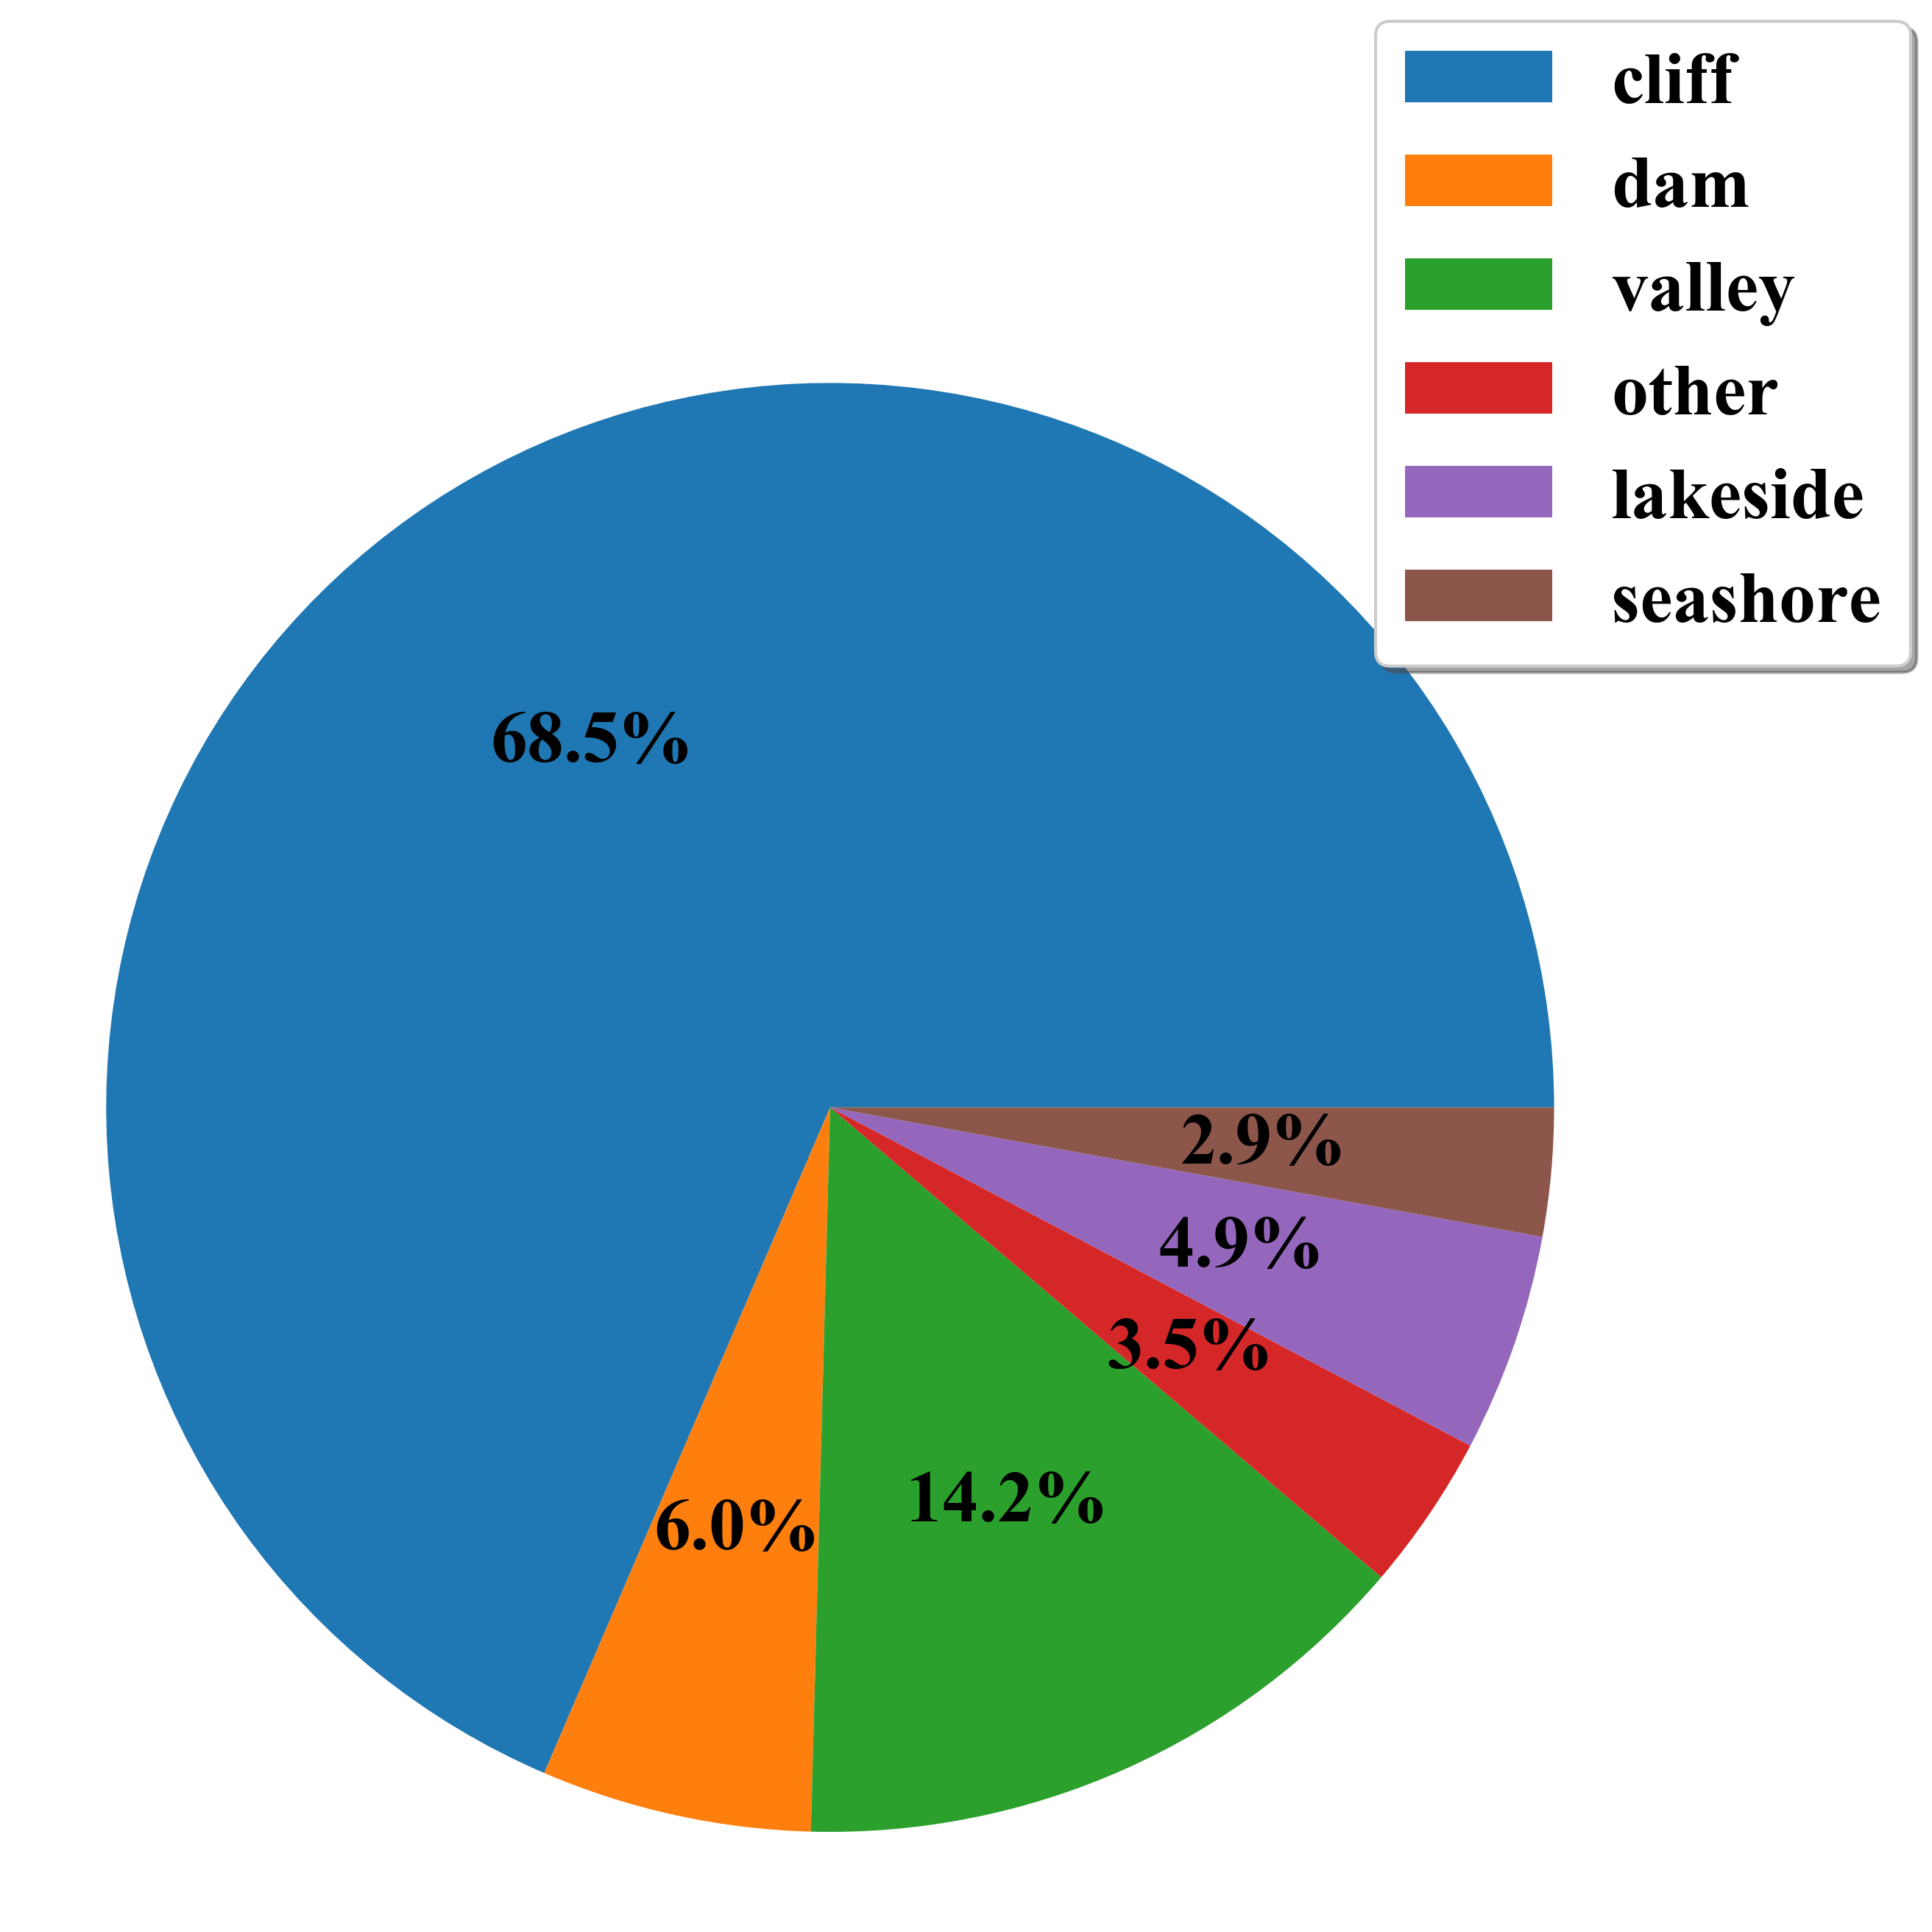

In [21]:
# Font
matplotlib.rc('font',**{'serif':['Times New Roman'], 'family':'serif', 'size':24})

# Data to plot
labels = cnt_clean.keys()
sizes = cnt_clean.values()
 
# Plot
fig = plt.figure(figsize=(8,8), dpi=300)
plt.pie(sizes, autopct='%1.1f%%')
plt.legend(labels, loc=('upper right'), shadow=True, bbox_to_anchor=(1.2, 1.2))
plt.tight_layout()
plt.axis('equal')
plt.show()

In [60]:
fig.savefig('plt.png', bbox_inches='tight', transparent=True, dpi=300)